# 1. Setup

In [236]:
"""
This script describes the consumable availability dataset
"""
# Import Statements and initial declarations
import os #
import datetime #
import pandas as pd
import numpy as np
from pathlib import Path
import re
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Regression analysis
import statsmodels.api as sm
from scipy import stats

# Set working directory
os.chdir('C:/Users/sm2511/Dropbox/Thanzi la Onse/05 - Resources/Module-healthsystem/consumables raw files')

# define a timestamp for script outputs
timestamp = datetime.datetime.now().strftime("_%Y_%m_%d_%H_%M")

# print the start time of the script
print('Script Start', datetime.datetime.now().strftime('%H:%M'))

# define a pathway to the data folder (note: currently outside the TLO model directory)
# remember to set working directory to TLOmodel/
outputfilepath = Path("./outputs")
resourcefilepath = Path("./resources")
datafilepath = Path("./../../Documents/health_systems/data")


Script Start 17:12


In [248]:
## Import cleaned consumables availability data (data at the level of level of care) and facility location data
stkout_df = pd.read_csv('consumables_df.csv', low_memory = False)

In [238]:
# Dataset for regression analysis
lmis_df = stkout_df[stkout_df.data_source.str.contains("lmis")|stkout_df.data_source.isna()]

In [239]:
# Convert distance figures to kilometers
lmis_df.dist_todh = lmis_df.dist_todh/1000 
lmis_df.dist_torms = lmis_df.dist_torms/1000

# 2. Data description

## 2.1 General 

In [240]:
lmis_df.describe()

,Unnamed: 0,item_code,available_prop,closing_bal,amc,dispensed,received,consumable_reporting_freq,consumables_reported_in_mth,fac_count,lat,long,lat_dh,long_dh,lat_rms,long_rms,dist_torms,drivetime_torms,dist_todh,drivetime_todh
count,528311.000000,528311.000000,528311.000000,5.283110e+05,5.283110e+05,5.283110e+05,5.283110e+05,528311.000000,528311.000000,0.0,492483.000000,492483.000000,492483.000000,492483.000000,492483.000000,492483.000000,490142.000000,490142.000000,490142.000000,490142.000000
mean,276688.403565,317.837124,0.659322,8.719238e+03,3.539042e+03,3.219883e+03,2.727069e+03,8.428344,108.571459,NaN,-14.025026,34.482103,-14.016154,34.471270,-14.250036,34.369871,110.302363,6806.939985,43.725416,3178.986355
std,159767.859115,634.014444,0.456349,6.648985e+04,1.817432e+04,1.806402e+04,2.674713e+04,3.450784,50.513165,NaN,1.770138,0.737522,1.774058,0.708003,1.654284,0.580114,80.020111,4278.188119,54.816086,3190.075078
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000,NaN,-17.095690,32.887428,-16.917683,32.887428,-15.804544,33.783521,0.656000,131.000000,0.000000,0.000000
25%,137414.500000,58.000000,0.000000,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,6.000000,82.000000,NaN,-15.551802,33.841670,-15.400935,33.854220,-15.804544,33.783521,53.939000,3878.000000,17.645000,1500.000000
50%,276906.000000,130.000000,1.000000,6.900000e+01,4.100000e+01,1.800000e+01,0.000000e+00,9.000000,103.000000,NaN,-14.240377,34.509980,-14.385960,34.421990,-13.980394,33.997467,95.159000,6232.000000,33.515000,2659.000000
75%,416421.500000,203.000000,1.000000,1.235000e+03,7.570000e+02,6.000000e+02,0.000000e+00,12.000000,121.000000,NaN,-13.039850,35.148060,-13.036061,35.174190,-13.980394,35.021192,155.056000,9138.000000,56.078000,4022.000000
max,551711.000000,2673.000000,1.000000,1.645148e+07,1.059714e+06,1.105000e+06,3.488000e+06,12.000000,269.000000,NaN,-9.493940,35.867260,-9.701590,35.649180,-11.425590,35.021192,535.167000,29277.000000,535.437000,29153.000000


In [241]:
lmis_df.describe(include=['O'])

,module_name,fac_type_tlo,fac_name,month,consumable_name_tlo,data_source,category,district,rms,gis_source
count,528311,528311,528311,528311,528311,528311,528311,492483,492483,492483
unique,23,5,679,12,122,4,12,28,3,3
top,contraception,Facility_level_1a,Chileka Health Centre,March,4-FDC tablets (R150/H75/Z400/E275),lmis_interpolation_rule3,reproductive_health,Lilongwe,RMS South,Master Health Facility Registry
freq,68427,383537,3912,45022,8206,173707,104673,40627,215680,397848


## 2.2 Missing data

In [197]:
lmis_df.isnull().sum()

Unnamed: 0                          0
module_name                         0
fac_type_tlo                        0
fac_name                            0
month                               0
item_code                           0
consumable_name_tlo                 0
available_prop                      0
closing_bal                         0
amc                                 0
dispensed                           0
received                            0
data_source                         0
consumable_reporting_freq           0
consumables_reported_in_mth         0
fac_count                      530927
category                            0
district                        35828
rms                             35828
lat                             35828
long                            35828
lat_dh                          35828
long_dh                         35828
lat_rms                         35828
long_rms                        35828
dist_torms                      38169
drivetime_to

## 2.3 Understanding the data structure
### 2.3.1 Quick summaries

In [211]:
# Summary by program
func = lambda x: x.nunique() 
tab = lmis_df.pivot_table(index = 'fac_type_tlo', aggfunc = {'fac_name': func,
                                                        'available_prop': 'mean'}) 
tab.columns = ['Average drug availability', 'Number of facilities']
tab.sort_values(by = 'Average drug availability', ascending = False)

,Average drug availability,Number of facilities
fac_type_tlo,,
Facility_level_4,0.823869,1
Facility_level_3,0.818887,4
Facility_level_2,0.716526,29
Facility_level_1b,0.666710,181
Facility_level_1a,0.642012,472


In [229]:
# Summary by month
func = lambda x: x.nunique() 
tab = lmis_df.pivot_table(index = 'month', aggfunc = {'available_prop': 'mean',
                                                      'received': 'mean',
                                                      'closing_bal': 'mean',
                                                      'amc': 'mean',
                                                      'data_source': 'first'}) 
tab.columns = ['Average AMC',  'Average drug availability', 'Average closing balance', 'Data source', 'Average quantity received']
tab.sort_values(by = 'Average drug availability', ascending = False)

,Average AMC,Average drug availability,Average closing balance,Data source,Average quantity received
month,,,,,
April,3815.743969,0.725921,7631.777194,original_lmis_data,1963.227107
November,3325.451613,0.725527,7628.819838,original_lmis_data,2597.907934
October,3459.752444,0.724004,8382.550712,original_lmis_data,2470.108992
February,3530.631081,0.713676,9859.952051,original_lmis_data,3123.414484
January,3394.911474,0.701435,10192.269405,original_lmis_data,1823.054589
December,3186.479378,0.659381,8761.535511,lmis_interpolation_rule1,3705.647482
July,3611.850619,0.655921,8367.171001,lmis_interpolation_rule2,2094.191939
June,3727.523835,0.652466,8803.159858,lmis_interpolation_rule2,4709.450161
May,3747.062854,0.649268,7128.518023,lmis_interpolation_rule2,3045.649570


In [242]:
# Summary of location by district and level of care
func = lambda x: x.nunique() 
tab = lmis_df.pivot_table(index = 'district', columns = 'fac_type_tlo', aggfunc = {'dist_todh': 'mean',
                                                                                    'dist_torms': 'mean'}) 
tab.sort_values(by = ('dist_torms', 'Facility_level_1a'), ascending = True)

dist_todh                                     \
fac_type_tlo Facility_level_1a Facility_level_1b Facility_level_2   
district                                                            
Blantyre             23.776708         19.837110              0.0   
Chiradzulu           27.860409         14.278778              0.0   
Thyolo               24.906792         33.387977              0.0   
Mzimba North         51.784698         12.697612              0.0   
Lilongwe             57.292054         46.279538              0.0   
Dowa                 45.122453         44.188188              0.0   
Mulanje              25.707413         21.319867              0.0   
Zomba                26.386519         33.199415              0.0   
Nkhata Bay           57.564637        149.140157              0.0   
Chikwawa             45.791212         48.172128              0.0   
Dedza                45.393442         36.987396              0.0   
Phalombe             20.300704         20.134101              0.0   
Rumphi               50.405246         44.898248              0.0   
Neno                 36.429048         40.118651              0.0   
Mchinji              42.573510        105.135776              0.0   
Ntchisi              29.940585         21.601265              0.0   
Salima               48.847998         27.394912              0.0   
Mwanza               20.620907               NaN              0.0   
Balaka               30.670868         25.898960              0.0   
Mzimba South         75.412283         52.502320              0.0   
Nsanje               84.078128        106.483937              0.0   
Kasungu              80.290130         77.971530              0.0   
Machinga             58.258366         47.442843              0.0   
Ntcheu               43.557620         42.568114              0.0   
Nkhotakota           66.965770         43.127794              0.0   
Karonga              48.069874         56.674892              0.0   
Mangochi             65.716169         52.502950              0.0   
Chitipa              56.891779         36.333337              0.0   

                                                      dist_torms  \
fac_type_tlo Facility_level_3 Facility_level_4 Facility_level_1a   
district                                                           
Blantyre                  0.0              NaN         23.965494   
Chiradzulu                NaN              NaN         36.279381   
Thyolo                    NaN              NaN         46.338487   
Mzimba North              0.0              NaN         47.256013   
Lilongwe                  0.0              NaN         56.386746   
Dowa                      NaN              NaN         69.016630   
Mulanje                   NaN              NaN         70.653108   
Zomba                     0.0              0.0         75.060756   
Nkhata Bay                NaN              NaN         77.505046   
Chikwawa                  NaN              NaN         88.347389   
Dedza                     NaN              NaN         92.078739   
Phalombe                  NaN              NaN         94.190751   
Rumphi                    NaN              NaN        100.607427   
Neno                      NaN              NaN        107.678915   
Mchinji                   NaN              NaN        110.691123   
Ntchisi                   NaN              NaN        112.367346   
Salima                    NaN              NaN        113.137918   
Mwanza                    NaN              NaN        122.659977   
Balaka                    NaN              NaN        129.131359   
Mzimba South              NaN              NaN        139.945302   
Nsanje                    NaN              NaN        141.435906   
Kasungu                   NaN              NaN        162.195015   
Machinga                  NaN              NaN        164.885336   
Ntcheu                    NaN              NaN        172.274669   
Nkhotakota                NaN              Na

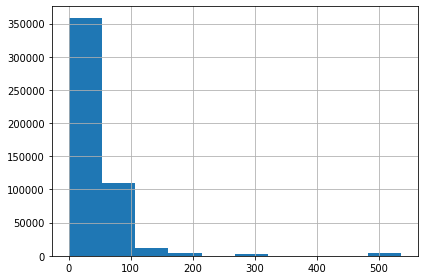

In [243]:
lmis_df.dist_todh.hist()

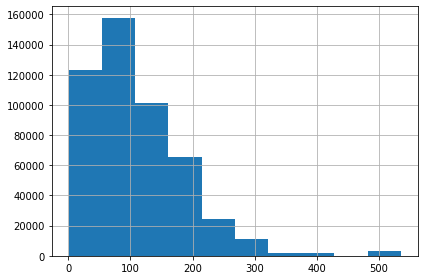

In [244]:
lmis_df.dist_torms.hist()

In [210]:
# Summary by program
func = lambda x: x.nunique() 
tab = lmis_df.pivot_table(index = 'category', aggfunc = {'item_code': func,
                                                        'available_prop': 'mean'}) 
tab.columns = ['Average drug availability', 'Number of consumables']
tab.sort_values(by = 'Average drug availability', ascending = False)

,Average drug availability,Number of consumables
category,,
malaria,0.858423,5.0
hiv,0.765299,8.0
contraception,0.700125,12.0
ncds,0.681364,7.0
general,0.648442,22.0
reproductive_health,0.626767,27.0
other_childhood_illnesses,0.604501,14.0
undernutrition,0.587602,5.0
road_traffic_injuries,0.578505,7.0


### 2.3.2 Heatmap of data availability

C:\Users\sm2511\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\sm2511\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


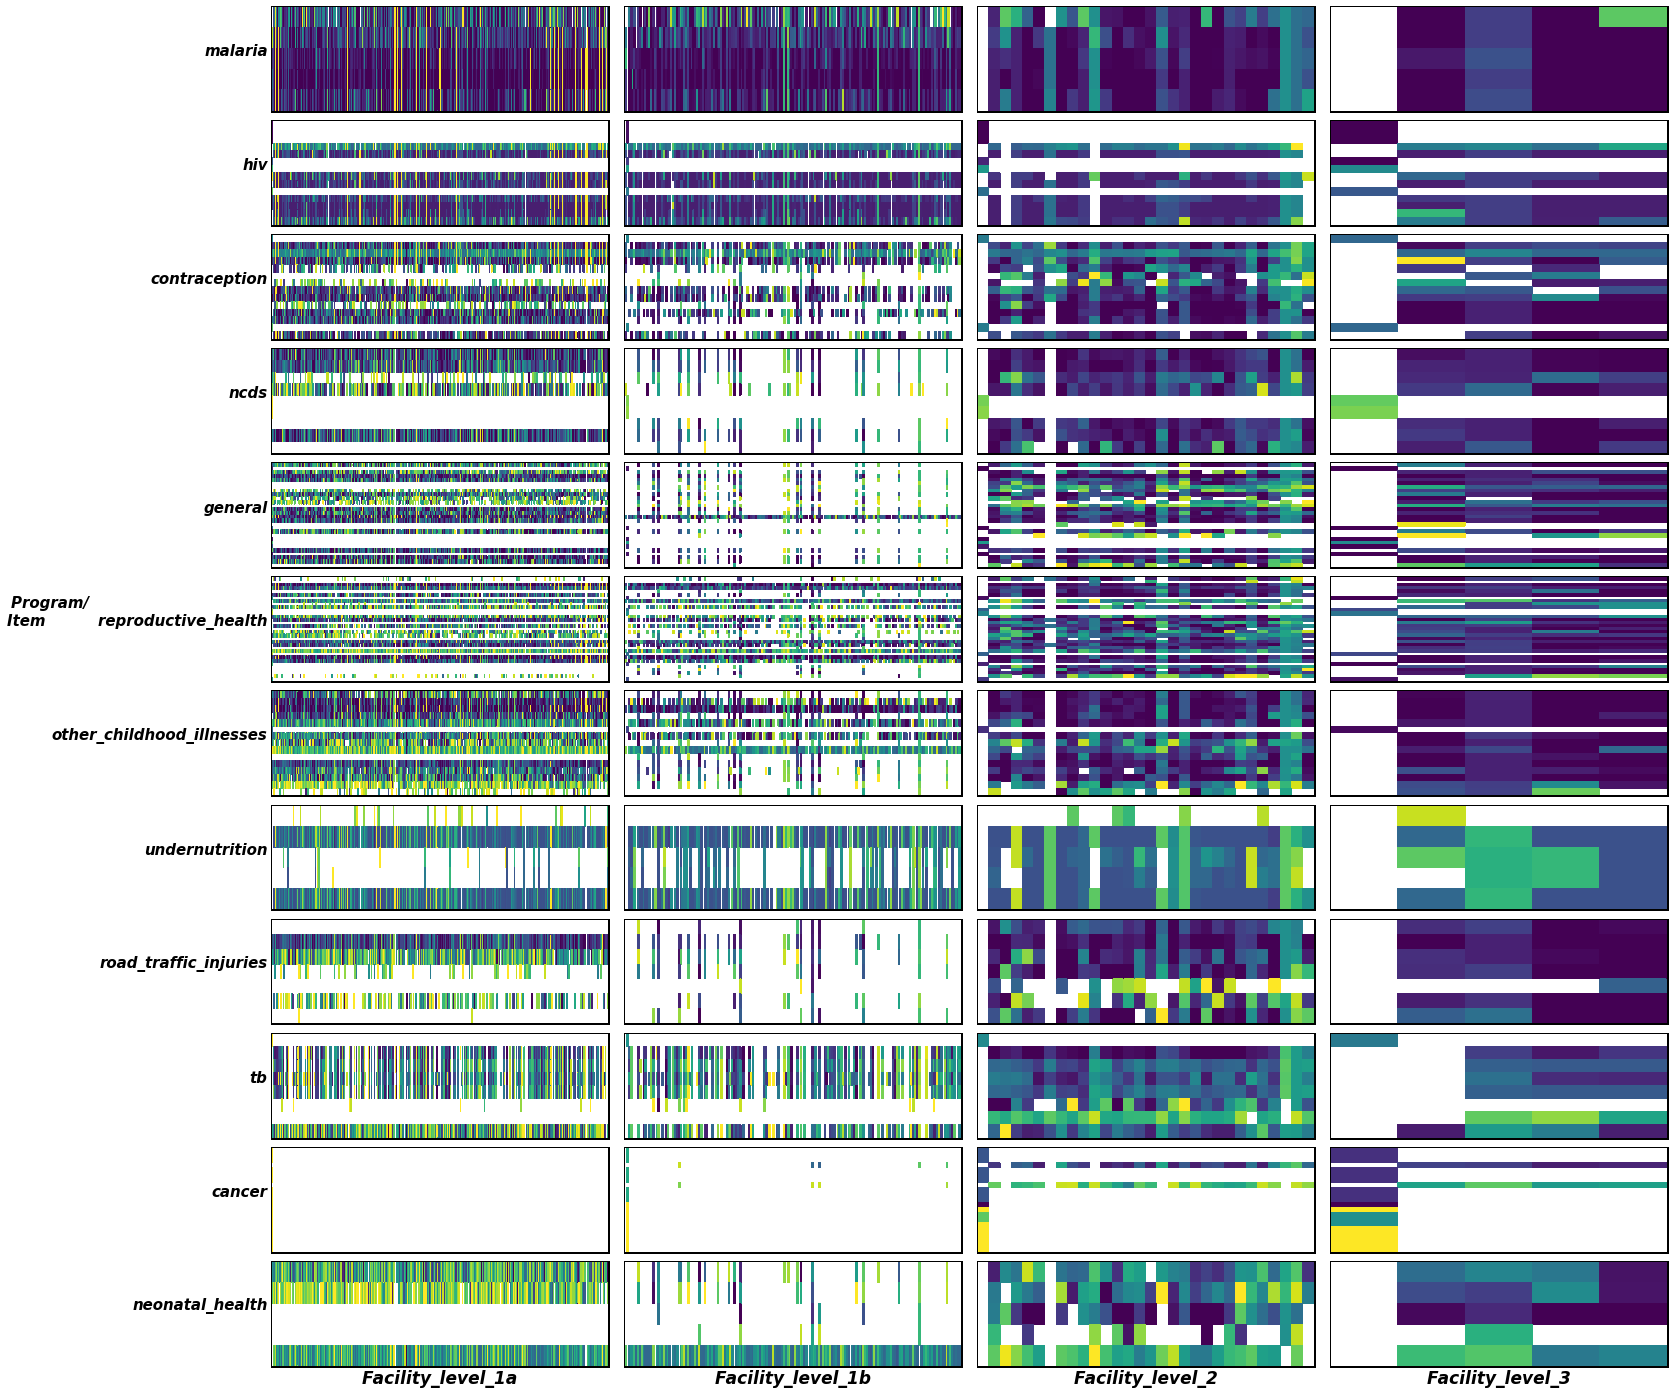

In [233]:
def add_subplot_border(ax, width=1, color='black' ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)
    
min_value = 0
max_value = 1

fac_types = stkout_df['fac_type_tlo'].unique()
categories = stkout_df.groupby('category')['available_prop'].mean().sort_values(ascending=False).index
index = np.argwhere(categories=='epi')
categories = np.delete(categories,index) # LMIS data (i.e. facility level data) not available for EPI
#categories = categories[0:2]

fac_types = fac_types[0:4]
stkout_df_hm = stkout_df.pivot_table(index = ['category','item_code'], columns = ['fac_type_tlo','fac_name'], aggfunc={'available_prop': np.mean})
fig, axs = plt.subplots(nrows=len(categories), ncols = len(fac_types), sharex=False, sharey = False,
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.05}, figsize = (25,25))

j = 0
k= 0
for row in axs:
    for k in range(len(fac_types)):
#        cond = stkout_df['category'] == categories[j]
        #print(categories[j], fac_types[k])

        stkout_df_hm_cat = stkout_df_hm.xs(categories[j], level=0, axis=0, drop_level=False)
        stkout_df_hm_cat = stkout_df_hm_cat.xs(fac_types[k], level=1, axis=1, drop_level=False)

        sns.heatmap(stkout_df_hm_cat, cmap = 'viridis_r', xticklabels = False, yticklabels = False, 
                   vmin = min_value, vmax = max_value, ax = row[k], cbar=False)

        if (((j == len(categories)/2 - 1)|(j == len(categories)/2 - 0.5)) & (k == 0)):
            label = 'Program/                                  \n' + 'Item          ' + categories[j]
        elif k == 0:
            label = categories[j]
        else:
            label = ''

        row[k].set_ylabel(label, fontsize=15, rotation = 0, fontstyle='italic', weight=600, ha = 'right')
        add_subplot_border(row[k])
        if j == len(categories) - 1:
            row[k].set_xlabel(fac_types[k],fontsize=17,fontstyle='italic', weight=600)
        else:
            row[k].set_xlabel("")
        k = k+1
    j = j+1
fig.tight_layout()
fig.savefig('heatmap_detailed_bylevel.png')

# 3. Variable selection for inferential analysis
## 3.1 Prepare data

In [ ]:
regdf = stkout_df[stkout_df.data_source.str.contains("lmis") & stkout_df.data_source.notna()]
regdf.dist_todh = regdf.dist_todh/1000 # convert meters to kilometers
regdf.dist_torms = regdf.dist_torms/1000 # convert meters to kilometers
regdf['lndist_todh'] = np.log(regdf.dist_todh + 1)
regdf['lndist_torms'] = np.log(regdf.dist_torms + 1)

cols = ['district', 'fac_type_tlo', 'fac_name', 'category', 'item_code', 'month', 
          'available_prop',
          'amc', 'dispensed', 'received', 'closing_bal',
          'dist_todh', 'dist_torms', 'drivetime_todh', 'drivetime_torms',
          'lndist_todh', 'lndist_torms']
# need to change above to opening bal
regdf = regdf[cols]
regdf = regdf.dropna()
regdf = regdf.reset_index()

# Convert categorical variables to dummies
regdf_tmp = pd.get_dummies(regdf, columns = ['district', 'fac_type_tlo', 'category', 'month'], drop_first = True)
regdf = pd.concat([regdf_tmp, regdf[['district', 'fac_type_tlo', 'category', 'month']]], axis = 1)

# Create lists of dummies
district_dums = [col for col in regdf if col.startswith('district_')]
category_dums = [col for col in regdf if col.startswith('category_')]
month_dums =[col for col in regdf if col.startswith('month_')]
fac_type_tlo_dums = [col for col in regdf if col.startswith('fac_type_tlo_')]
all_dums = [district_dums, category_dums, month_dums, fac_type_tlo_dums]
all_dums = [item for sublist in all_dums for item in sublist] # flatten list of lists

In [ ]:
# Convert closing balance figure to opening balance figure
items_list = pd.unique(regdf.item_code)
facs_list = pd.unique(regdf.fac_name)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
regdf['opening_bal'] = np.nan
for fac in facs_list:
    for item in items_list:
        for i in range(2,12):
            cond_currmonth =(regdf['item_code'] == item) & (regdf['fac_name'] == fac) & (regdf['month'] == month_order[i])
            cond_prevmonth = (regdf['item_code'] == item) & (regdf['fac_name'] == fac) & (regdf['month'] == month_order[i-1])
            regdf.loc[cond_currmonth, 'opening_bal'] = regdf.loc[cond_currmonth, 'closing_bal']


In [ ]:
regdf.to_csv("C:/Users/sm2511\Dropbox/York/Research Projects/TLO Model/regdf.csv")

## 3.2 Check for multicollinearity

In [ ]:
# Multicollinearity
######################
all_nums = ['amc', 'opening_bal','dist_todh', 'dist_torms', 'drivetime_todh', 'drivetime_torms']
corrdf = regdf[all_nums]

#Store correlation matrix in an excel workbook
corr = corrdf.corr()
(corr.style.background_gradient(cmap='coolwarm')).set_precision(2).to_excel("corr_matrix.xlsx", engine="openpyxl")

# Print correlation matrix
x.corr()
(corr.style.background_gradient(cmap='coolwarm')).set_precision(2)

## 3.3 Variable selection using backward elimination

In [304]:
# Backward Elimination based on AIC (Constant introduced in exogeneous matrix)
##############################################################################
true_values = regdf['available_prop']
all_nums = ['amc', 'opening_bal','drivetime_todh', 'drivetime_torms'] # 'dist_todh', 'dist_torms'
cols = [all_nums, all_dums]
cols = [item for sublist in cols for item in sublist] # flatten list of lists
pmax = 1
while (len(cols)>0):
    p= []
    
    X_1 = regdf[cols]
    X_1 = sm.add_constant(X_1)
    k = np.shape(X_1)[1]
    n_obs = np.shape(X_1)[0]
    model = sm.Logit(true_values,X_1).fit()
    
    p = pd.Series(model.pvalues.values[1:],index = cols)   
    r2 = model.rsquared
    pmax = max(p)
    feature_with_p_max = p.idxmax()

    predicted_values = model.predict()
    sumofresiduals = sum(np.array([(predicted_values[xi]-true_values[xi])**2 for xi in range(1,n_obs)]))
    aic_old = n_obs*math.log(sumofresiduals/n_obs) + 2*k
    
    aic_new = aic_old
    iter = 0
    
    while (aic_new <= aic_old):
        iter = iter + 1 
        print('Iteration',iter)
        
        aic_old = aic_new
        cols.remove(feature_with_p_max)
        print("Variable dropped:", feature_with_p_max,"; p-value of variable:", pmax)
        print("OLD AIC:", aic_old)
        
        X_1 = regdf[cols]
        X_1 = sm.add_constant(X_1)
        k = np.shape(X_1)[1]
        print("Degrees of freedom:", k)
        model = sm.Logit(true_values,X_1).fit()

        p = pd.Series(model.pvalues.values[1:],index = cols)   
        r2 = model.rsquared
        pmax = max(p)
        feature_with_p_max = p.idxmax()

        predicted_values = model.predict()
        sumofresiduals = sum(np.array([(predicted_values[xi]-true_values[xi])**2 for xi in range(1,n_obs)]))
        aic_new = n_obs*math.log(sumofresiduals/n_obs) + 2*k
        print("NEW AIC:", aic_new)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
print(model.summary())

Iteration 1
Variable dropped: month_October ; p-value of variable: 0.9696359831887954
OLD AIC: -824604.4843970988
Degrees of freedom: 59
NEW AIC: -824606.4828081253
Iteration 2
Variable dropped: drivetime_torms ; p-value of variable: 0.9336715654488357
OLD AIC: -824606.4828081253
Degrees of freedom: 58
NEW AIC: -824608.4759315468
Iteration 3
Variable dropped: district_Nsanje ; p-value of variable: 0.8647296080846409
OLD AIC: -824608.4759315468
Degrees of freedom: 57
NEW AIC: -824610.4469449789
Iteration 4
Variable dropped: district_Mwanza ; p-value of variable: 0.7536855567688514
OLD AIC: -824610.4469449789
Degrees of freedom: 56
NEW AIC: -824612.3484546035
Iteration 5
Variable dropped: month_November ; p-value of variable: 0.745763525254648
OLD AIC: -824612.3484546035
Degrees of freedom: 55
NEW AIC: -824614.2426340817
Iteration 6
Variable dropped: district_Mchinji ; p-value of variable: 0.6077492385647456
OLD AIC: -824614.2426340817
Degrees of freedom: 54
NEW AIC: -824615.9793128497
I

strong multicollinearity or other numerical problems.
